### Importar librerias necesarias

In [6]:
#librerias
!pip install hmmlearn
import pandas as pd #libreria pandas
import matplotlib.pyplot as plt #Libreria encargarda de dibujar
import seaborn as sns #libreria pra la vvisualización de datos para Python desarrollada sobre matplotlib
from sklearn.model_selection import train_test_split #Para modelos de entranamiento
from sklearn.preprocessing import StandardScaler #Estandarizar
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve , classification_report #Para graficar la matris
from sklearn.svm import SVC #importamos 
from sklearn.model_selection import GridSearchCV #importamos la libreria grid
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB #Funcion para implementar el toorema de bayes
from sklearn.metrics import roc_auc_score #Source_score para la respuesta 
from sklearn.metrics import roc_curve #OBjetemos la curva
from hmmlearn import hmm


## Cargar el Dataset

In [7]:
data = pd.read_csv("file.csv")

**Visualización del Dataset**

In [8]:
data.head().style.background_gradient(axis = 0)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1


In [9]:
data.head(3000)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


# Descripción del Dataset

# Limpieza del Dataset

In [10]:
#Verfificamos que no hayan valores nulos
data.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [11]:
#Ver el numero de clases
print(data.nunique())

Temperature       335
Humidity          725
Light             428
CO2              1894
HumidityRatio    1505
Occupancy           2
dtype: int64


***Como observamos nuestro Dataset, está limpio, por lo que no va hacer necesario hacer transoformaciones ni nada por el estilo***

In [12]:
#Describimos el dataset para ver sus valores estadisticos
data.describe().style.background_gradient(axis = 0)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


**Observamos que la media para todos nuestras variables de entrada y salida la mas alta es el CO2 con una media 717.906470 lo que nos da una idea de que este varariable va a estar mas presente**


# Análisis a la variable objetiva

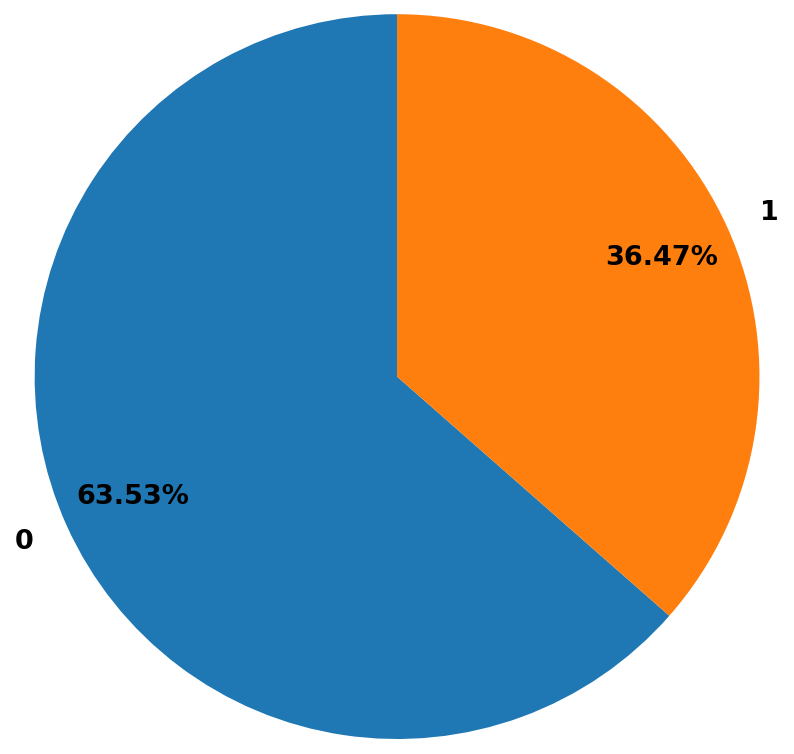

In [13]:
#Es necesario saber el porcentaje con la que nuestros datos categoricos (0) y (1) están siendo modelados en el Dataset
Oc_count = data['Occupancy'].value_counts().tolist() #Cuenta los tipos de datos categoricos
Oc_label = data['Occupancy'].value_counts().index
plt.figure(figsize = (8,4),dpi = 150) #Configuracion de la grafica
plt.pie(Oc_count , labels = Oc_label , autopct = '%1.2f%%',textprops={'fontweight':'bold','size' :13},startangle= 90,
       pctdistance = 0.8 , radius = 2)
plt.show() #Graficamos

0    1693
1     972
Name: Occupancy, dtype: int64

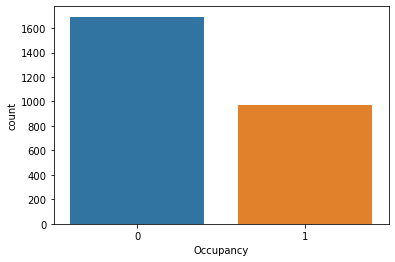

In [14]:
#Observamos sus destribuciones de las vatiable objetivo
sns.countplot(data = data , x = 'Occupancy') #Graficamos los valores 0 y 1
data['Occupancy'].value_counts() #Contamos los valores 0 y 1

**Podemos observar que el valor 0 es el que está mas presente con un total de 1700 aproximandamente lo que que se dedice que 
No hay posibilidades de ocupación de la habitación.**

<AxesSubplot:xlabel='Occupancy', ylabel='Humidity'>

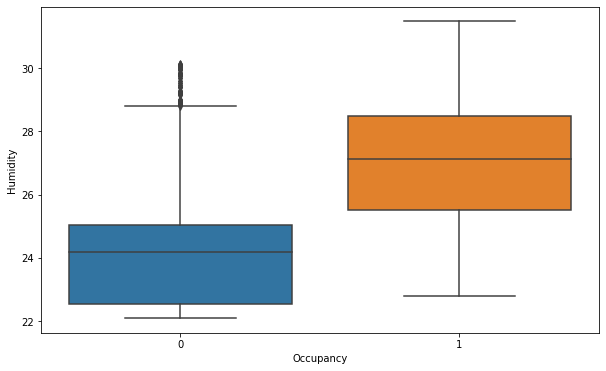

In [15]:
#Veamos como se comparta la variable objetivo con la humedad
plt.figure(figsize = (10,6))
sns.boxplot(data = data , x = 'Occupancy' , y ='Humidity')

**Observamos que el siguiente diagrama de cajas  nos muestra que el valor 1 está mas relacinada con la humedad por lo que vemos que si una habitacion es habitable dependerá de la humedad**

<AxesSubplot:title={'center':'Correlación entre variables'}>

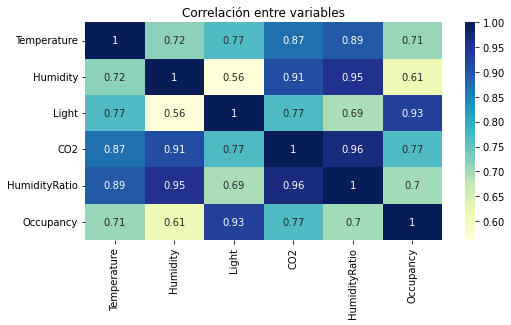

In [16]:
#Obtenemos la matriz de correlacion
plt.subplots(figsize=(8,4))
plt.title('Correlación entre variables')
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

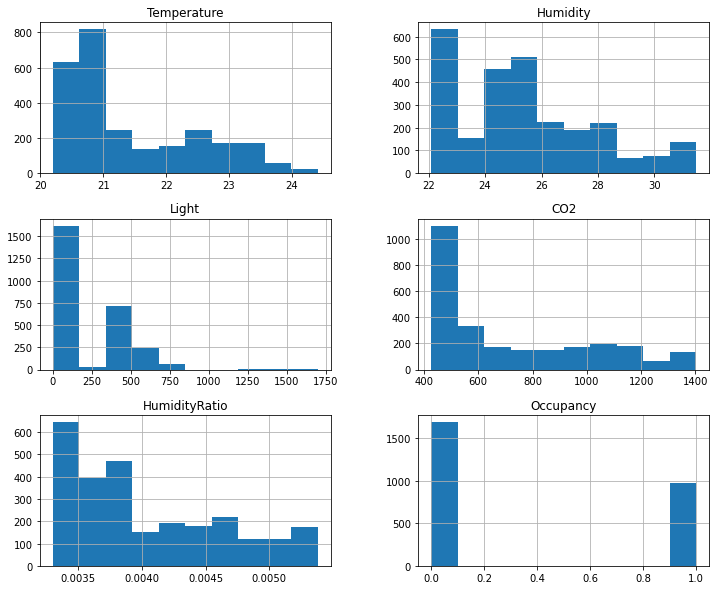

In [17]:
data.hist(figsize=(12,10))
plt.show()

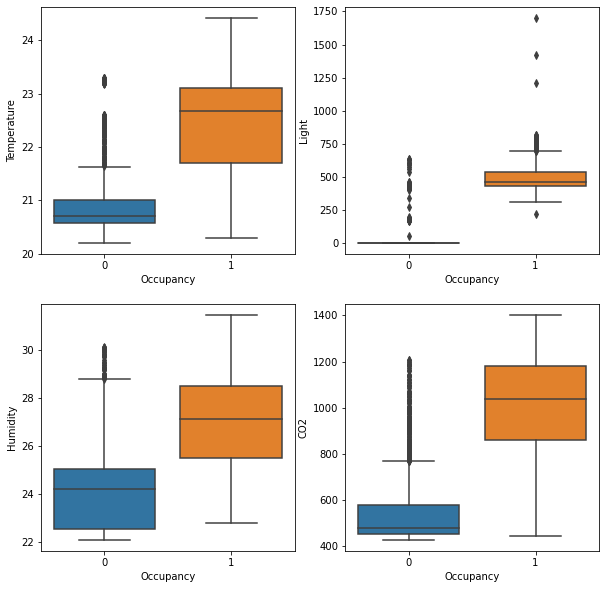

In [18]:
#Observamos como se están comportando las variables de entrada a relacion a la variable objetiva
fig,x = plt.subplots(2,2, figsize=(10,10))
cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
for n in range(4):
    sns.boxplot(x='Occupancy', y=cols[n], data=data, ax=x[n%2,n//2])

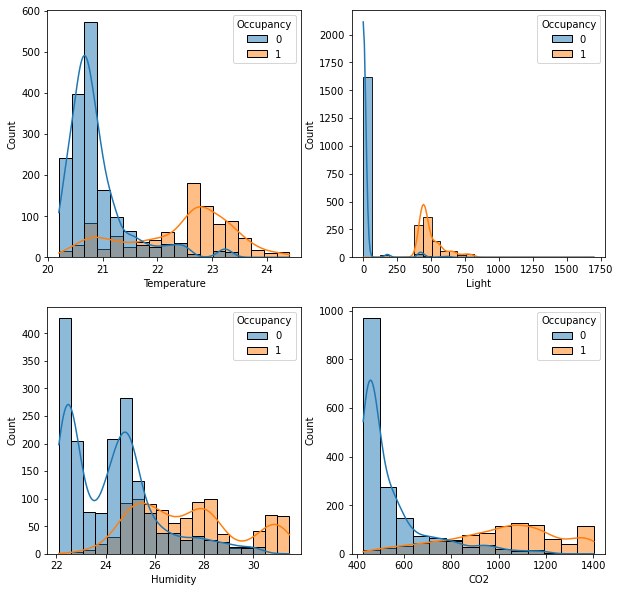

In [19]:
fig.clear()
fig,x = plt.subplots(2,2, figsize=(10,10))
for n in range(4):
    sns.histplot(kde=True, data=data, x=cols[n], hue='Occupancy', ax= x[n%2, n//2])

# Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [20]:
#Entrenamiento del modelo
X = data.drop('Occupancy', axis = 1)
y = data['Occupancy']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

**Primer aplicaremos el modelo de clasificacion SVN**

***SVM funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo.***

In [23]:
param_grid = {'C':[0.001,0.01,1]}
svc = SVC()

In [24]:
#GridSearchCV es una clase disponible en scikit-learn que permite evaluar y seleccionar de forma 
#sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar
grid_model = GridSearchCV(svc,param_grid) #HipperParamtro #Hacer la matriz de confusion, escoger los mejores


In [25]:
grid_model.fit(scaled_x_train , y_train) #Escalamos el modelo

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 1]})

In [26]:
def metrix(model): #Funcion encargada para obtener los datos predecidos
    y_pred = model.predict(scaled_x_test) #Pre
    print(classification_report(y_test,y_pred))  #mostramos la clasificación
    plot_confusion_matrix(model , scaled_x_test , y_test) #Mostramos la matris de confusión

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       513
           1       0.94      1.00      0.97       287

    accuracy                           0.98       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.98      0.98       800



C:\Users\Dugs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


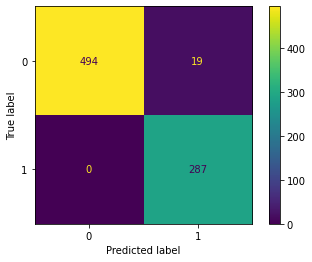

In [27]:
metrix(grid_model)

**Segunda forma de aplicar SVN**

In [28]:


X, Y = data.iloc[:,1:-1], data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Create a dataframe that used to store data from confusion matrix and accuracy 
result = pd.DataFrame(columns=['Classifier','True Negative', 'False Postive', 'False Negative', 'True Positive', 'Classifier Accuracy'])


def accuracy_vis(xtest, ytest, ypred, predit_proba):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    
    # Confusion Matrix Visulation
    cm = confusion_matrix(ytest, ypred)
    x_axis_labels = ['Actual Postive', 'Actual Negative']
    y_axis_labels = ['Predicted Postive', 'Predicted Negative']
    sns.heatmap(cm, fmt=".0f", annot=True, linewidths=.5, ax=ax1, 
                cmap="YlGnBu", xticklabels=x_axis_labels)
    ax1.set_yticklabels(y_axis_labels, rotation=0, ha='right')
    
    # ROC Curve Visulation
    logit_roc_auc = roc_auc_score(ytest, ypred)
    fpr, tpr, thresholds = roc_curve(ytest, predit_proba[:,1])
    ax2.plot(fpr, tpr, label='Logistic Regression (area = {})'.format(round(logit_roc_auc,6)))
    ax2.plot([0, 1], [0, 1],'r--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend()
    plt.show()
    return(confusion_matrix(Y_test, Y_pred).ravel())

Accuracy of Support Vector Machine Classifier on test set: 97.901049%


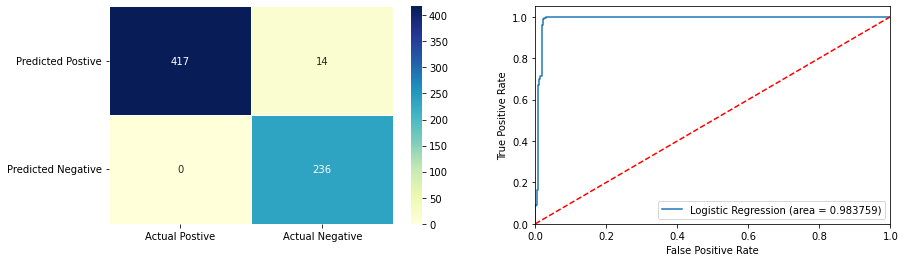

In [29]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, Y_train)
Y_pred, svm_score, predit_proba = svm.predict(X_test), svm.score(X_test, Y_test), svm.predict_proba(X_test)
print('Accuracy of Support Vector Machine Classifier on test set: {:.6f}%'.format(svm_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['SVM'] = ['Support Vector Machine', tn, fp, fn, tp, round(svm_score*100, 6)]

# Aplicar Naive Bayes

In [30]:
X, Y = data.iloc[:,1:-1], data.iloc[:,-1] #Forma de optener la columas, sin necesidad de escribir sus variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) #Entrenamos al modelo

Precisión del clasificador Naive Bayes en el conjunto de prueba: 96.750000%


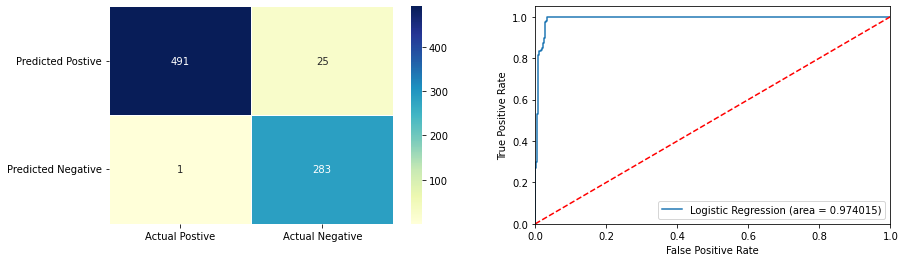

In [31]:

nb = GaussianNB() #Hacemos uso de la variable GauusianNB
nb.fit(X_train, Y_train) #Uso del metodo fit para X_train, Y_train
Y_pred, nb_score, predit_proba = nb.predict(X_test), nb.score(X_test, Y_test), nb.predict_proba(X_test) #Y_pred 
print('Precisión del clasificador Naive Bayes en el conjunto de prueba: {:.6f}%'.format(nb_score*100)) #Mostramos la Acurrencia
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba) #Mostramos los valores
result.loc['NB'] = ['Naive Bayes', tn, fp, fn, tp, round(nb_score*100, 6)] #Resultado

# Segunda Forma (Aplicando Naive Bayes)

In [32]:
algoritmo = GaussianNB()


In [33]:
algoritmo.fit(X_train, y_train)

GaussianNB()

In [34]:

y_pred = algoritmo.predict(X_test)


In [35]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
1.0


In [36]:

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


Matriz de Confusión:
[[513   0]
 [286   1]]


In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [39]:
new_df=pd.DataFrame({'actual':y_test,
                    'predicted':pred_2})

In [40]:
print(new_df)

      actual  predicted
1763       0          0
795        0          0
2099       0          0
104        1          1
1661       1          1
...      ...        ...
2321       0          0
564        0          0
2328       0          0
1109       1          1
666        0          0

[533 rows x 2 columns]


In [41]:
print(score_2)

0.9774859287054409


In [42]:
accuracy = metrics.accuracy_score(y_test, pred_2)*100
print('El accuracy del modelo es: ' , accuracy , '%')

El accuracy del modelo es:  97.74859287054409 %


In [43]:
precision = metrics.precision_score(y_test,pred_2)*100
print('La precisión del modelo es: ' , precision , '%')

La precisión del modelo es:  95.26315789473684 %


In [44]:
recall = metrics.recall_score(y_test,pred_2)*100
print('El recall del modelo es del: ', recall, '%')

El recall del modelo es del:  98.36956521739131 %


In [45]:
#Metrica para el valor-F
F1 = 2 * (precision * recall) / (precision + recall)
print('La puntuación de F1 es de: ', F1)

La puntuación de F1 es de:  96.79144385026738


# APLICAMOS HIDEN MARKOV


In [46]:
!pip install hmmlearn


In [64]:
#Librerias para la división del dataset y el escalamiento
VarEntrada = ['Temperature', 'Humidity', 'Light', 'CO2']
VarObjetivo = ['Occupancy']
W = data[VarEntrada]
z = data[VarObjetivo]

X_train, X_test, y_train, y_test = train_test_split(W, z, test_size=0.3, random_state=2)

X_train.shape, X_test.shape

((1865, 4), (800, 4))

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
# Transofmar es escalado a partir 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

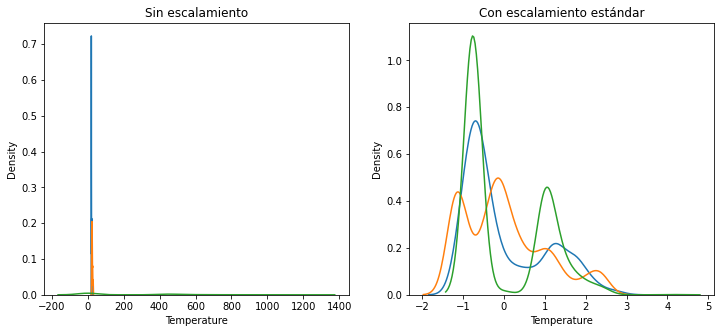

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Sin escalamiento')
sns.kdeplot(X_train['Temperature'], ax=ax1)
sns.kdeplot(X_train['Humidity'], ax=ax1)
sns.kdeplot(X_train['Light'], ax=ax1)

# after scaling
ax2.set_title('Con escalamiento estándar')
sns.kdeplot(X_train_scaled['Temperature'], ax=ax2)
sns.kdeplot(X_train_scaled['Humidity'], ax=ax2)
sns.kdeplot(X_train_scaled['Light'], ax=ax2)
plt.show()

In [68]:
#Se aplica el modelo de Gaussian Hidden Markov 
HMM = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 150, random_state = 2)

#Se entrena al modelo con las variables de entrada escaladas
HMM.fit(X_train_scaled)

#Se realiza la predicción con las variables de entrada para testing de la misma manera escalados
y_pred = HMM.predict(X_test_scaled)
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 1 0 1 1 1 1 1 1 0 

NameError: name 'means' is not defined

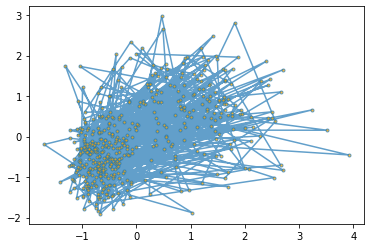

In [69]:
X, Z = HMM.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

In [70]:
#Metrica de accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('El accuracy del modelo es: ' , accuracy , '%')

El accuracy del modelo es:  90.875 %


In [71]:
#Metrica de precisión
precision = metrics.precision_score(y_test,y_pred)*100
print('La precisión del modelo es: ' , precision , '%')

La precisión del modelo es:  80.63660477453581 %


In [72]:
#Metrica de recall
recall = metrics.recall_score(y_test,y_pred)*100
print('El recall del modelo es del: ', recall, '%')

El recall del modelo es del:  100.0 %


In [73]:
#Metrica para el valor-F
F1 = 2 * (precision * recall) / (precision + recall)
print('La puntuación de F1 es de: ', F1)

La puntuación de F1 es de:  89.28046989720998


In [74]:
#Metrica para el valor-F
f1 = metrics.f1_score(y_test, y_pred, average='binary')
print(f1)

0.8928046989720999


In [75]:
print(confusion_matrix(y_test, y_pred))

[[423  73]
 [  0 304]]


<AxesSubplot:>

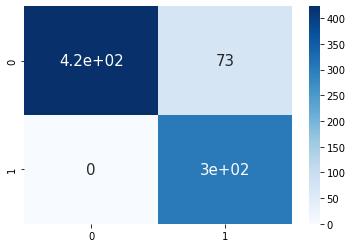

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap="Blues", annot=True,annot_kws={"size": 15})

# Aplicando Fuzzy Logic

In [77]:
!pip install fuzzy-c-means
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [79]:
fcm = FCM(n_clusters=2)
fcm.fit(X_train_scaled.to_numpy())

In [86]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_test_scaled.to_numpy())
print(fcm_labels)

[0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0
 1 0 1 1 0 1 1 1 1 1 1 0 

In [87]:
'''
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X_test_scaled.iloc[:,0], y_test.iloc[:,1], alpha=.1)
axes[1].scatter(X_test_scaled.iloc[:,0], y_test_scaled.iloc[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=800, c='w')
plt.show() '''

print("Work in progress")

Work in progress


In [88]:
accuracy = metrics.accuracy_score(y_test, fcm_labels)*100
print('El accuracy del modelo es: ' , accuracy , '%')

El accuracy del modelo es:  89.25 %


In [89]:
#Metrica de precisión
precision = metrics.precision_score(y_test,fcm_labels)*100
print('La precisión del modelo es: ' , precision , '%')

La precisión del modelo es:  85.85526315789474 %


In [90]:
#Metrica de recall
recall = metrics.recall_score(y_test,fcm_labels)*100
print('El recall del modelo es del: ', recall, '%')

El recall del modelo es del:  85.85526315789474 %


In [91]:
#Metrica para el valor-F
F1 = 2 * (precision * recall) / (precision + recall)
print('La puntuación de F1 es de: ', F1)

La puntuación de F1 es de:  85.85526315789474


In [92]:
print(confusion_matrix(y_test, fcm_labels))

[[453  43]
 [ 43 261]]


<AxesSubplot:>

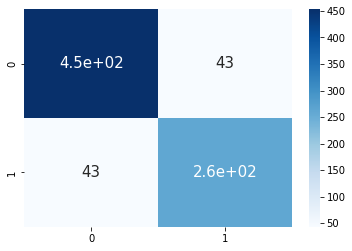

In [93]:
sns.heatmap(confusion_matrix(y_test, fcm_labels),cmap="Blues", annot=True,annot_kws={"size": 15})